# Домашнее задание №3

### Николаев Евгнеий Алексеевич, группа 22.М08-мм.

Элементарная пространственная фильтрация – разделы 3.4 - 3.5
- линейная – однородная и взвешенное среднее по маскам различных размеров рис. 3.33 - 3.34;
- нелинейная (медианная) - рис. 3.35.

In [8]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
%precision 4
import warnings
warnings.filterwarnings('ignore')

In [9]:
def Filter(image, transformation_function, **kernel_size):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE) # считывание изображения
    filtered_img = transformation_function(img, **kernel_size)
    fig, ax = plt.subplots(1, 2, figsize=(20, 5), dpi=200)
    ax[0].imshow(img, cmap='gray') # вывод изначального изображения
    ax[0].set_title("Original image")
    ax[1].imshow(filtered_img, cmap='gray') # вывод отфильтрованного изображения
    ax[1].set_title("Filtered image")
    plt.show()

## Линейная фильтрация

Линейная фильтрация изображения - это процесс применения линейного фильтра к каждому пикселю изображения. Линейный фильтр - это математическая операция, которая выполняет свертку изображения с ядром (также называемым фильтром или маской), чтобы изменить значения пикселей изображения.

Ядро фильтра представляет собой матрицу чисел, которые используются для вычисления новых значений пикселей. Каждый пиксель изображения является центром своего окна, которое определяется размером ядра фильтра. Затем ядро перемещается по всем пикселям в изображении, и для каждого пикселя выполняется операция свертки, которая использует значения пикселей в текущем окне и значения ядра фильтра для вычисления нового значения пикселя.

Линейная фильтрация может использоваться для различных целей, таких как уменьшение шума, улучшение резкости изображения, изменение яркости и контрастности, а также для выявления границ и текстур в изображении. Различные типы ядер фильтра могут использоваться для достижения разных эффектов при линейной фильтрации изображения.

#### Однородная

Линейная однородная фильтрация изображения - это один из методов обработки изображений, который использует линейный фильтр с ядром, состоящим из равных весов. Такой фильтр также называют "усредняющим фильтром" или "фильтром размытия".

Для выполнения линейной однородной фильтрации изображения сначала создается ядро фильтра, которое состоит из равных весов. Затем ядро применяется к каждому пикселю изображения, что приводит к усреднению значений пикселей в окне, определяемом размером ядра фильтра.

Этот метод часто используется для уменьшения шума на изображении и сглаживания деталей. Однако, линейная однородная фильтрация может также привести к потере высокочастотных компонент изображения, что может снизить его резкость и детализацию. Поэтому, в зависимости от целей обработки изображения, могут применяться и другие методы фильтрации, использующие ядра фильтра с разными весами или другой формой.

Метод линейной однородной фильтрации применяется для сглаживания изображения и уменьшения шума. Он основан на использовании линейной фильтрации, при которой каждый пиксель на изображении заменяется на взвешенную сумму значений пикселей в окрестности данного пикселя.

Линейный фильтр применяется к каждому пикселю на изображении, и его размер и веса зависят от выбранного типа фильтра. Одним из примеров линейного фильтра является среднее значение, при котором каждый пиксель заменяется на среднее значение пикселей в окрестности данного пикселя.

In [10]:
def homogeneous(img, kernel_size):
    # Создание ядра из равных весов 
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size**2)
    # Получение размеров изображения
    rows, cols = img.shape[:2]
    # Инициализация массива для сглаженного изображения
    smoothed_img = np.zeros_like(img, dtype=np.float32)
    # Применение ядра к каждому пикселю изображения
    for i in range(kernel_size//2, rows-kernel_size//2):
        for j in range(kernel_size//2, cols-kernel_size//2):
            # Получение окна изображения
            window = img[i-kernel_size//2:i+kernel_size//2+1, j-kernel_size//2:j+kernel_size//2+1]
            # Применение ядра к окну
            smoothed_pixel = np.sum(kernel * window)
            # Запись сглаженного значения в массив
            smoothed_img[i, j] = smoothed_pixel
    # Конвертация массива в изображение и возврат его
    smoothed_img = np.uint8(smoothed_img)
    return smoothed_img

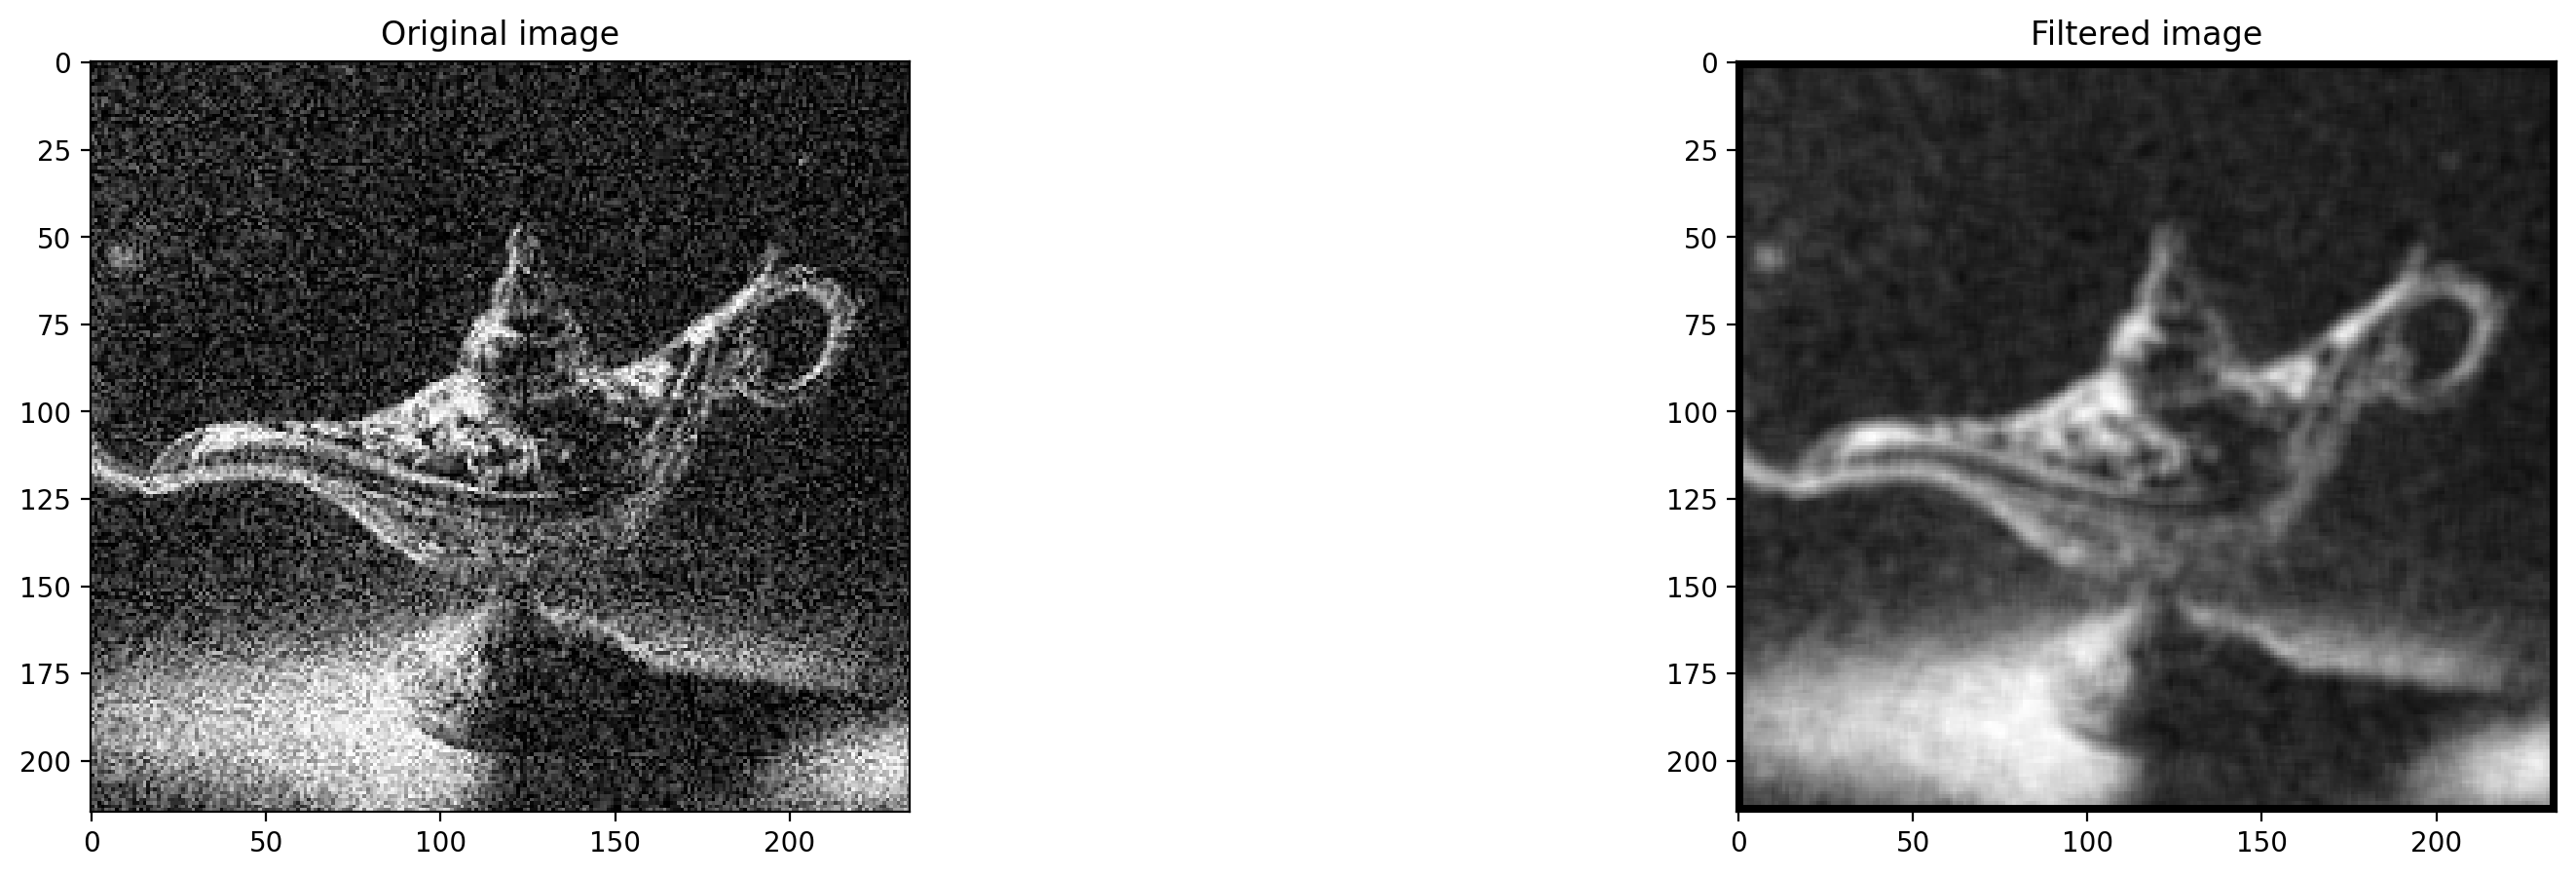

In [12]:
Filter('img_1.jpeg', homogeneous, kernel_size = 5)

Функция homogeneous выполняет простое усреднение (сглаживание) изображения img с использованием ядра заданного размера kernel_size. Входной параметр img должен быть двумерным массивом NumPy, представляющим изображение в оттенках серого.

Сначала функция создает ядро, состоящее из равных весов, размером kernel_size x kernel_size. Для этого она создает массив kernel, заполненный единицами, и затем делит его на сумму элементов, чтобы получить ядро с равными весами.

Затем функция проходит по каждому пикселю в изображении img и применяет ядро к каждому пикселю, чтобы вычислить сглаженное значение. Для каждого пикселя i, j изображения img, функция берет окно размером kernel_size x kernel_size, центрированное вокруг этого пикселя. Затем она вычисляет среднее значение пикселей в окне, используя ядро, и записывает это значение в соответствующий пиксель в массиве smoothed_img.

Функция возвращает сглаженное изображение в виде массива NumPy, приведенного к типу np.uint8.

Функция homogeneous может быть использована для улучшения качества изображений и устранения шумов с помощью простого усреднения. Однако этот метод может быть неэффективным для изображений с деталями или текстурой, так как он удаляет высокочастотные компоненты изображения и сглаживает детали.

#### Взвешенное среднее

Линейная фильтрация с использованием взвешенного среднего является методом обработки изображений, который использует линейный фильтр с ядром, состоящим из весовых коэффициентов. В отличие от линейной фильтрации с ядром, состоящим из равных весов, взвешенное среднее позволяет установить различную важность для каждого пикселя в окне фильтрации.

Для выполнения линейной фильтрации с использованием взвешенного среднего сначала создается ядро фильтра, которое состоит из весовых коэффициентов, определяющих важность каждого пикселя в окне фильтрации. Затем ядро применяется к каждому пикселю изображения, что приводит к вычислению взвешенного среднего значений пикселей в окне.

Этот метод может использоваться для различных задач обработки изображений, таких как улучшение резкости изображений, увеличение контрастности, уменьшение шума и др. В зависимости от цели обработки изображения, могут быть использованы различные ядра фильтрации с различными весовыми коэффициентами, которые позволяют достичь нужного эффекта.

Однако, важно помнить, что линейная фильтрация с использованием взвешенного среднего может привести к потере некоторых низкочастотных компонент изображения и снижению его яркости. Поэтому, при применении этого метода обработки изображения необходимо учитывать особенности конкретной задачи и настраивать параметры ядра фильтрации соответствующим образом.

In [18]:
def weighted_average(img, kernel_size, weights):
    # Веса ядра фильтра
    weights = weights
    # Нормализация весов
    weights /= np.sum(weights)
    # Получение размеров изображения
    rows, cols = img.shape[:2]
    # Инициализация массива для сглаженного изображения
    smoothed_img = np.zeros_like(img, dtype=np.float32)
    # Применение ядра к каждому пикселю изображения
    for i in range(kernel_size//2, rows-kernel_size//2):
        for j in range(kernel_size//2, cols-kernel_size//2):
            # Получение окна изображения
            window = img[i-kernel_size//2:i+kernel_size//2+1, j-kernel_size//2:j+kernel_size//2+1]
            # Применение ядра к окну
            smoothed_pixel = np.sum(weights * window) / np.sum(weights)
            # Запись сглаженного значения в массив
            smoothed_img[i, j] = smoothed_pixel
    # Конвертация массива в изображение и возврат его
    smoothed_img = np.uint8(smoothed_img)
    return smoothed_img

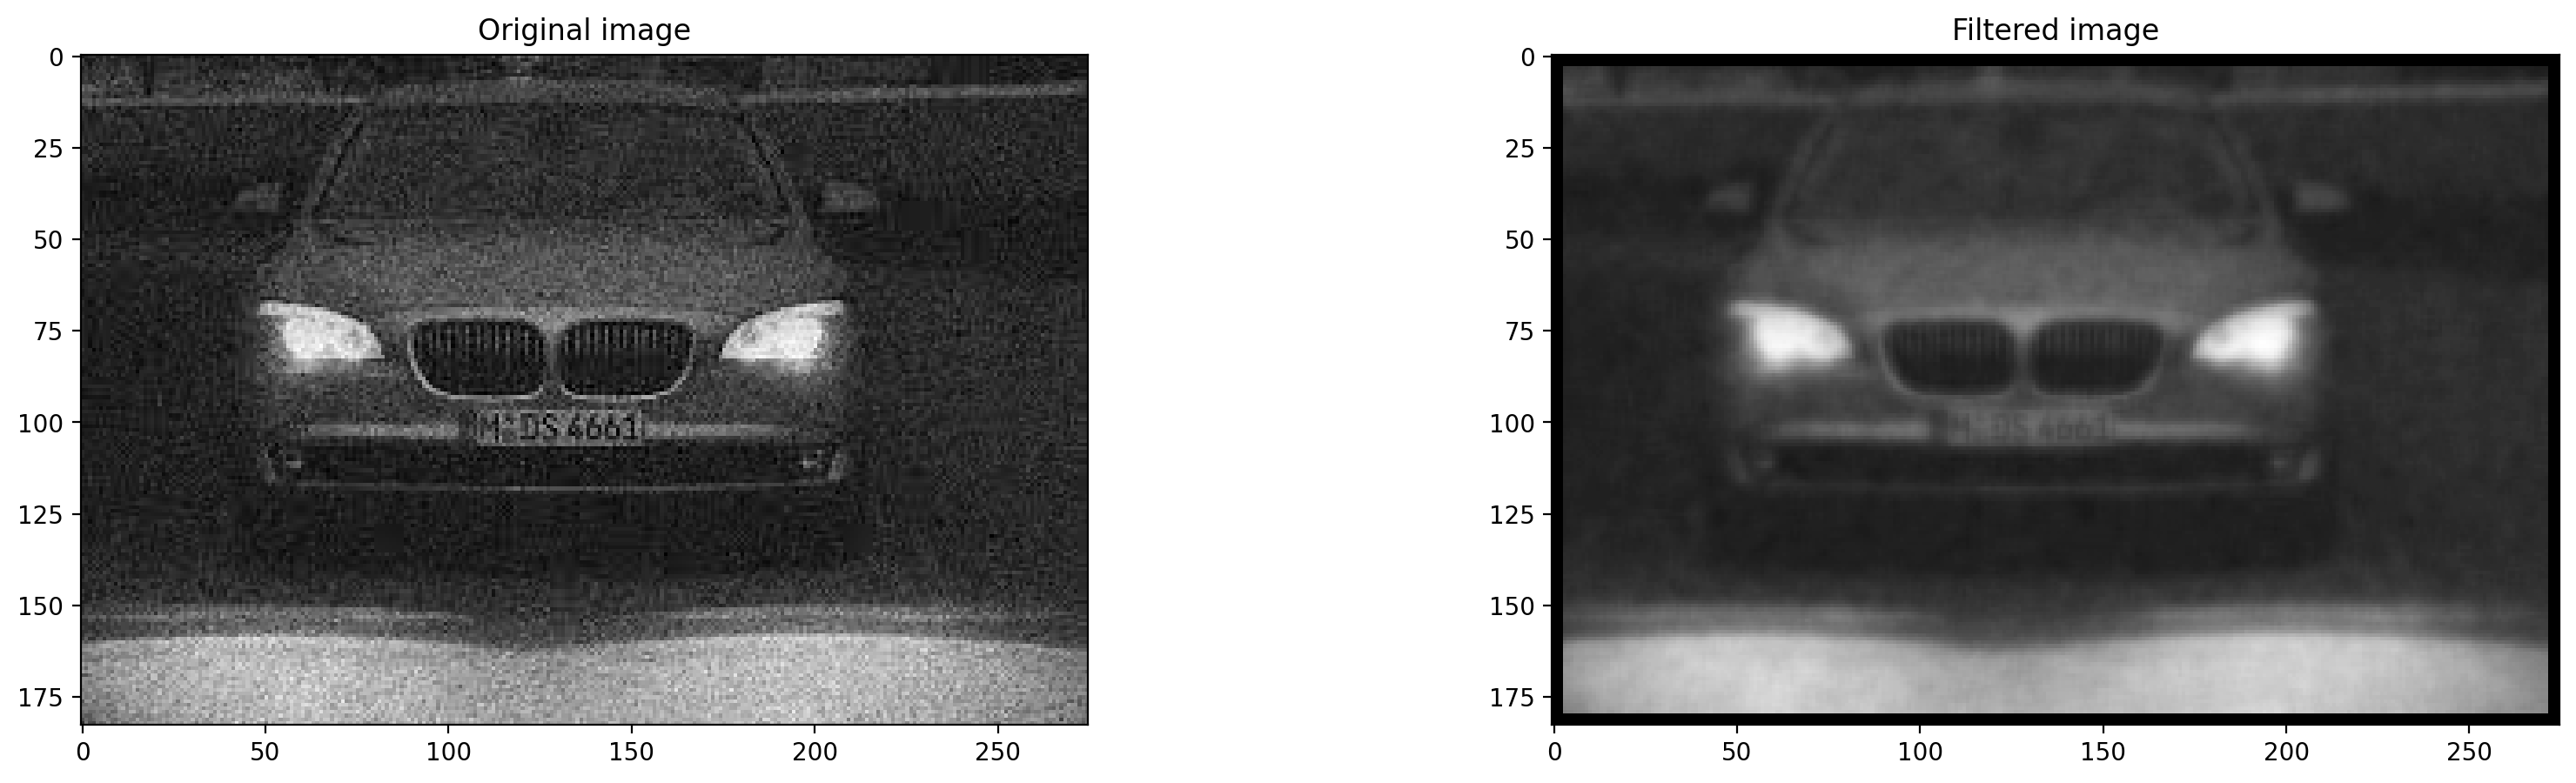

In [23]:
Filter('img_2.jpeg', weighted_average, kernel_size = 7, weights = np.array([
                 [1, 1, 2, 2, 2, 1, 1],
                 [1, 2, 2, 4, 2, 2, 1],
                 [2, 2, 4, 8, 4, 2, 2],
                 [2, 4, 8, 16, 8, 4, 2],
                 [2, 2, 4, 8, 4, 2, 2],
                 [1, 2, 2, 4, 2, 2, 1],
                 [1, 1, 2, 2, 2, 1, 1]], dtype=np.float32))

Данный код использует функцию weighted_average для фильтрации изображения 'img_1.jpeg' с помощью ядра, заданного весами, определенными в массиве weights. Функция weighted_average использует линейную фильтрацию изображения с ядром, заданным весами. Входные параметры функции weighted_average в данном случае:

img - изображение 'img_1.jpeg';
kernel_size - размер ядра фильтра равен 7;
weights - ядро фильтра, заданное массивом весов размером 7x7.
В массиве весов weights значения больше установлены в центре и уменьшаются по мере удаления от центра, что позволяет повысить важность центральных пикселей при фильтрации изображения.

Далее, функция weighted_average применяется к изображению 'img_1.jpeg' с использованием заданных параметров. Результатом функции является сглаженное изображение, которое передается в функцию Filter, вместе с исходным изображением и функцией фильтрации. Функция Filter обрабатывает изображение с помощью заданной функции фильтрации и отображает результат на экране.

Таким образом, данный код выполняет линейную фильтрацию изображения 'img_1.jpeg' с использованием заданного ядра фильтра, которое позволяет повысить важность центральных пикселей при фильтрации.

Линейная однородная фильтрация и взвешенное среднее - это два разных метода обработки изображений, которые используют линейную фильтрацию для достижения различных эффектов на изображении.

Линейная однородная фильтрация использует одинаковые веса для всех пикселей в окрестности и заменяет значение текущего пикселя на среднее значение всех пикселей в окрестности. Она используется для сглаживания изображения и уменьшения шума, но может также привести к потере деталей на изображении и сглаживанию границ.

Взвешенное среднее, с другой стороны, использует различные веса для каждого пикселя в окрестности и заменяет значение текущего пикселя на взвешенное среднее всех пикселей в окрестности. Веса могут быть заданы вручную или автоматически подобраны, и они определяют вклад каждого пикселя в окрестности в итоговое значение пикселя. Взвешенное среднее позволяет более точно оценить яркость каждого пикселя и уменьшить эффект шумов, при этом сохраняя более тонкие детали на изображении и границы между объектами.

Таким образом, основное отличие между линейной однородной фильтрацией и взвешенным средним заключается в том, что взвешенное среднее использует различные веса для каждого пикселя в окрестности, тогда как линейная однородная фильтрация использует одинаковые веса для всех пикселей. Взвешенное среднее позволяет более точно оценить яркость каждого пикселя и сохранить более тонкие детали на изображении и границы между объектами, но может потребовать более сложныхвычислений и подбора оптимальных весов для каждого конкретного случая. Линейная однородная фильтрация, с другой стороны, является более простым методом и может быть быстро применена к изображению для общего сглаживания и уменьшения шума. Выбор между этими методами зависит от конкретной задачи и требований к качеству изображения, которое необходимо получить после обработки.

## Нелинейная (медианная) фильтрация

Нелинейная фильтрация - это метод обработки изображений, который использует нелинейные операции для улучшения качества изображения. В отличие от линейной фильтрации, которая использует линейные операции, нелинейная фильтрация может применять различные операции, такие как медианная фильтрация, фильтрация билатеральных фильтров и др.

Медианная фильтрация является одним из наиболее распространенных методов нелинейной фильтрации. Она использует медианное значение пикселей в окне фильтрации вместо их среднего значения. Этот метод позволяет уменьшить шум на изображении, сохраняя при этом резкость краев и деталей.

Фильтрация билатеральных фильтров является еще одним методом нелинейной фильтрации, который использует различные веса для пикселей в зависимости от их расстояния и разницы яркости. Этот метод позволяет сохранить резкость краев и деталей, уменьшая при этом шум на изображении.

In [25]:
def median_filter(img, kernel_size):
    # Размер изображения
    height, width = img.shape[:2]
    
    # Половина размера окна фильтра
    k = kernel_size // 2
    
    # Создание выходного массива
    smoothed_img = np.zeros((height, width), dtype=np.uint8)
    
    # Применение медианного фильтра для каждого пикселя
    for i in range(k, height - k):
        for j in range(k, width - k):
            # Извлечение окна
            window = img[i - k:i + k + 1, j - k:j + k + 1]
            
            # Вычисление медианного значения
            median_value = np.median(window)
            
            # Присвоение медианного значения выходному массиву
            smoothed_img[i, j] = median_value
    
    return smoothed_img

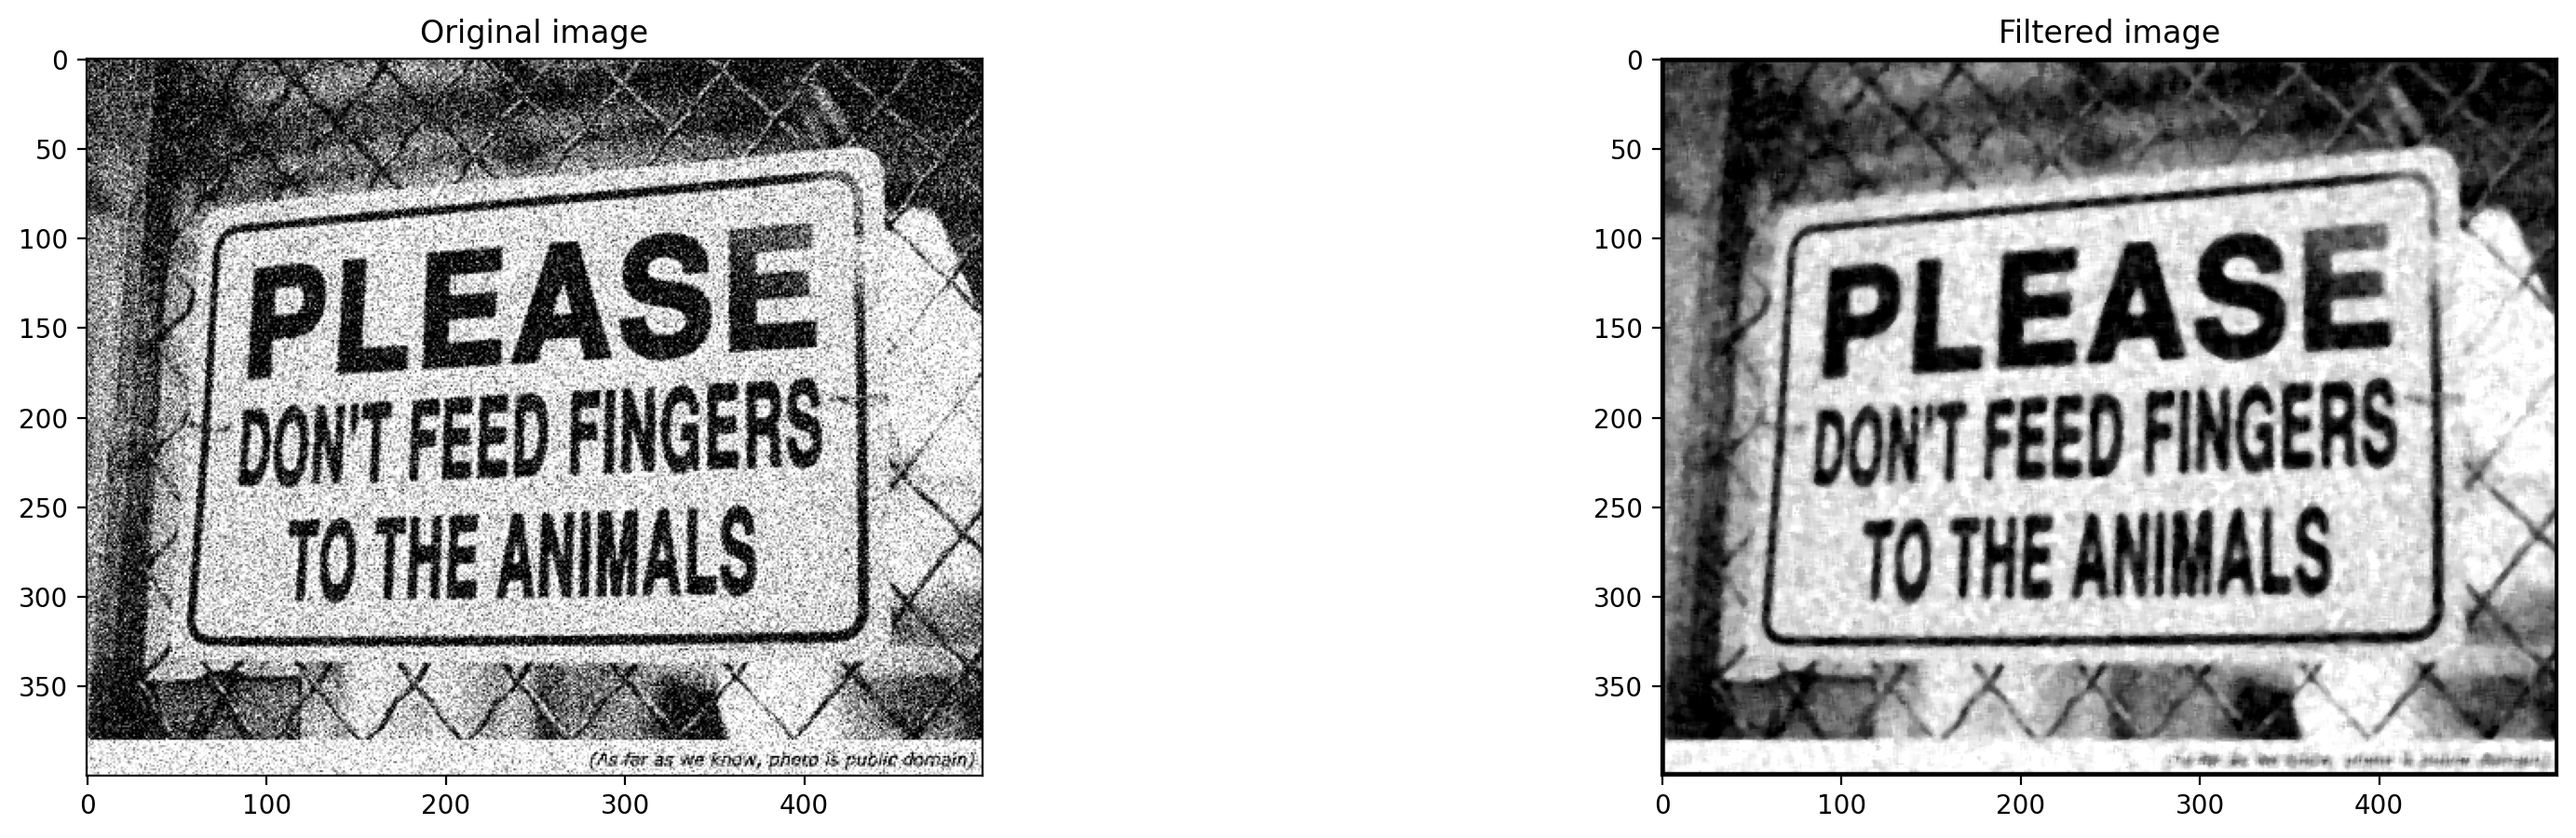

In [27]:
Filter('img_3.png', median_filter, kernel_size = 5)

половины размера окна фильтра. Затем создается массив smoothed_img того же размера, что и входное изображение, который будет содержать обработанные значения пикселей.

Затем происходит проход по каждому пикселю входного изображения с использованием двух вложенных циклов. В каждой итерации цикла извлекается окно в размере kernel_size x kernel_size пикселей вокруг текущего пикселя. Затем медианное значение в окне вычисляется с помощью функции np.median(). Медианное значение затем присваивается соответствующему пикселю в массиве smoothed_img.

После прохода по всем пикселям входного изображения, функция возвращает массив smoothed_img, который содержит обработанные значения пикселей.

Итак, функция median_filter выполняет медианный фильтр для удаления шума с помощью вычисления медианного значения пикселей в окне фильтра вокруг каждого пикселя входного изображения.

Нелинейная медианная фильтрация - это метод обработки изображений, который используется для сглаживания изображения и уменьшения шума. В отличие от линейной фильтрации, который использует линейную комбинацию значений пикселей в окрестности, медианная фильтрация использует нелинейную операцию, которая заменяет значение текущего пикселя на медианное значение значений пикселей в окрестности.

Медианное значение - это значение, которое находится в середине упорядоченного списка значений. Использование медианного значения вместо среднего значения позволяет более эффективно уменьшать влияние выбросов и сохранять границы между объектами на изображении.